<a href="https://colab.research.google.com/github/victormattos2013/Emprestimo-Automoveis/blob/main/Victor_Mattos_Emprestimo_Automovel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='dark'>**Validação de modelos e métricas de avaliação**</h1>

### Projeto

Uma empresa de empréstimo de automóveis está passando por uma situação complicada, com alta demanda para uma frota reduzida de veículos e alto número de inadimplentes, trazendo um prejuízo grande para a empresa.

Nós fomos contratados para buscar melhorias na identificação de inadimplentes. A análise dos clientes atualmente é feita de forma manual, cliente por cliente, tomando muito tempo e ainda assim a detecção de inadimplentes é muito imprecisa.

Nossa tarefa é utilizar os dados fornecidos pela empresa para **classificar** os clientes em adimplentes e inadimplentes.

## <font color='dark'>Análise Exploratória e Pré-processamento</h1>

In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/victormattos2013/Emprestimo-Automoveis/main/emp_automovel.csv'

dados = pd.read_csv(url)
dados.head()

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.0,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.0,0
1,9000.0,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.0,0
2,15750.0,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.0,0
3,9000.0,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.0,0
4,7650.0,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.0,0


In [3]:
info = dados.info()
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54025 entries, 0 to 54024
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   receita_cliente      54025 non-null  float64
 1   anuidade_emprestimo  54025 non-null  float64
 2   anos_casa_propria    54025 non-null  float64
 3   telefone_trab        54025 non-null  int64  
 4   avaliacao_cidade     54025 non-null  float64
 5   score_1              54025 non-null  float64
 6   score_2              54025 non-null  float64
 7   score_3              54025 non-null  float64
 8   score_social         54025 non-null  float64
 9   troca_telefone       54025 non-null  float64
 10  inadimplente         54025 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 4.5 MB


## <font color='dark'>Classificando dados</h1>

### Criando um modelo inicial

In [4]:
#SEPARAR FEATURES(x) e CLASS(y)
x = dados.drop('inadimplente', axis=1)
y = dados['inadimplente']

In [5]:

# Proceed with creating and fitting the model
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier(max_depth=5)
modelo.fit(x, y)  # TREINANDO MODELO
modelo.score(x, y)  # CALCULANDO ACURACIA

0.9132993984266543

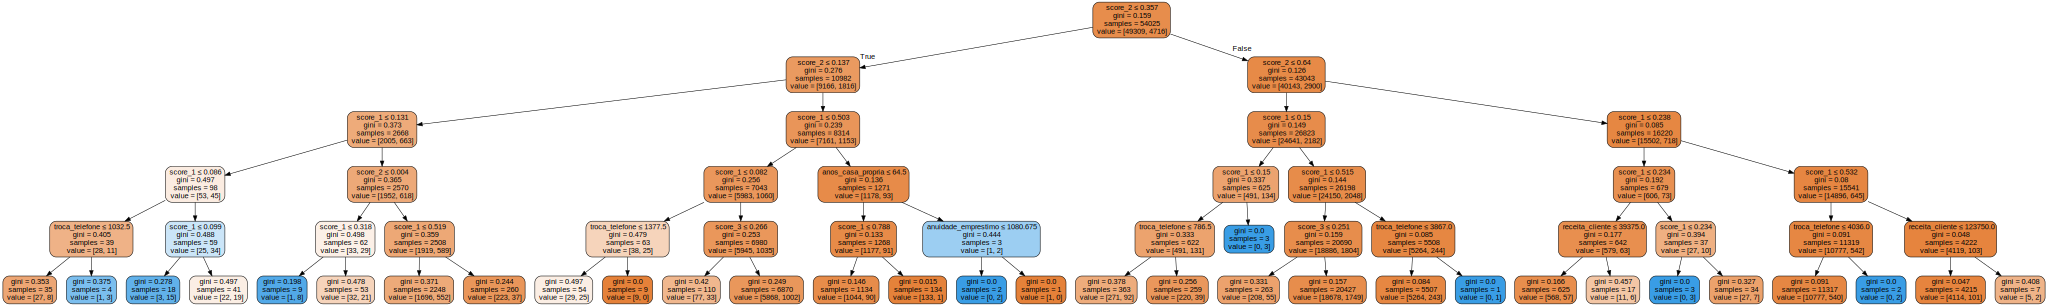

In [6]:
#GRAPHVIZ
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(modelo, out_file=None,
                           feature_names=x.columns,
                           filled=True,
                           rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [7]:
#CRIAR MODELO ARVORE DE DECISÃO COM SEPARAÇÃO TREINO TESTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
SEED = 5
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.25, stratify=y, random_state=SEED)
modelo = DecisionTreeClassifier(max_depth=5)
modelo.fit(x_treino, y_treino)
print(modelo.score(x_teste, y_teste))

0.9114533205004812


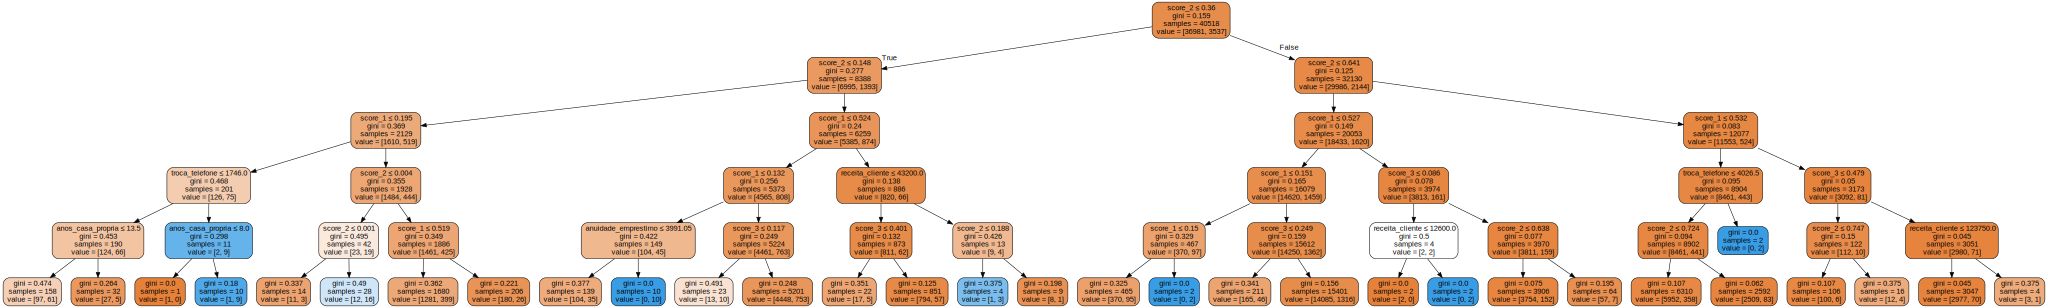

In [8]:
#GRAPHVIZ
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(modelo, out_file=None,
                           feature_names=x.columns,
                           filled=True,
                           rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph

### Validando o modelo

Avaliar os modelo com base nos mesmos dados usados no treinamento não é interessante. É preciso que a avaliação seja feita em dados independentes.

Avaliar o modelo nos próprios dados de treinamento seria o análogo a entregar uma prova com as questões e o gabarito para uma pessoa e no momento de avaliá-la novamente, entregar uma prova com as mesmas questões e alternativas. É esperado que essa pessoa se sairá bem por já ter visto as respostas e ter decorado o resultado. Isso é diferente de ter aprendido a matéria a partir daquela prova e depois fazer uma prova com conteúdo parecido e ter um resultado positivo.

No intuito de checar a generalização de um modelo, devemos separar o conjunto de dados em 3 partes: dados de treinamento, validação e teste.

- o conjunto de treinamento é utilizado para treinar os modelos. Os modelos vão entender o padrão dos dados a partir desse conjunto de dados.

- o conjunto de validação é utilizado para avaliar o desempenho de diferentes modelos, com dados novos que não foram usados no treinamento do modelo.

- o conjunto de teste fica separado dos demais desde o momento inicial para simular os dados do mundo real. Ele não é utilizado em nenhum momento no treinamento e nem na validação, servindo como uma estimativa da capacidade do modelo escolhido de generalizar e prever novos dados.

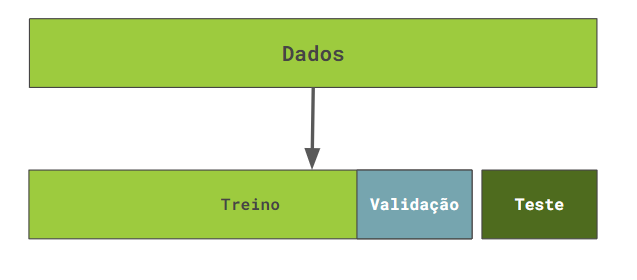

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
SEED = 5
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.15, stratify=y, random_state=SEED)
x_treino_novo, x_validacao, y_treino_novo, y_validacao = train_test_split(x_treino, y_treino, test_size=0.25, stratify=y_treino, random_state=SEED)


modelo = DecisionTreeClassifier(max_depth=5)
modelo.fit(x_treino_novo, y_treino_novo)
print(modelo.score(x_validacao, y_validacao))

0.9123769706471562


### Avaliando o modelo

In [10]:
#metricas
previsoes = modelo.predict(x_validacao)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(accuracy_score(y_validacao, previsoes))
print(precision_score(y_validacao, previsoes))
print(recall_score(y_validacao, previsoes))
print(f1_score(y_validacao, previsoes))

0.9123769706471562
0.16666666666666666
0.000998003992015968
0.001984126984126984


In [11]:
#matriz confusao
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_validacao, previsoes))

[[10474     5]
 [ 1001     1]]


## <font color='dark'>Métricas de avaliação</h1>

### Acurácia, precisão e recall

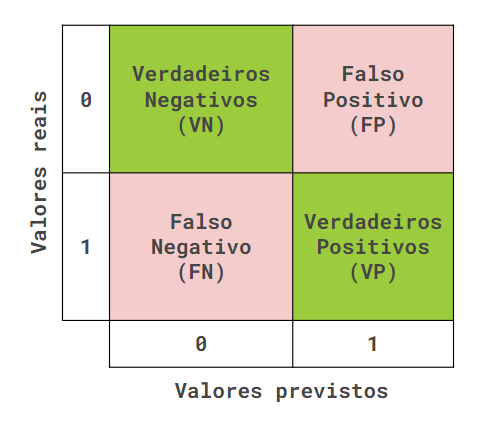

#### Acurácia


É a métrica mais comum e básica em problemas de classificação. É utilizada para medir a proporção de dados previstos corretamente pelo modelo em relação ao total dos dados. Essa métrica é útil quando as classes da variável alvo estão balanceadas, ou seja, quando existe uma quantidade equilibrada de dados para cada classe e uma importância equivalente de classificação entre as categorias. Como exemplo de utilização, temos o reconhecimento de dígitos manuscritos. Podemos utilizar imagens de caracteres de letras e números para treinar um modelo de classificação para identificar corretamente a escrita. Como cada letra ou número não tem uma importância maior do que as demais, a acurácia se torna uma boa métrica para medir a capacidade do modelo em classificar corretamente os dígitos.

Abaixo, podemos analisar o cálculo da acurácia a partir da matriz de confusão. Ela é calculada somando os acertos do modelo (VN + VP) e dividindo por todos os acertos e erros (VP+VN+FP+FN).

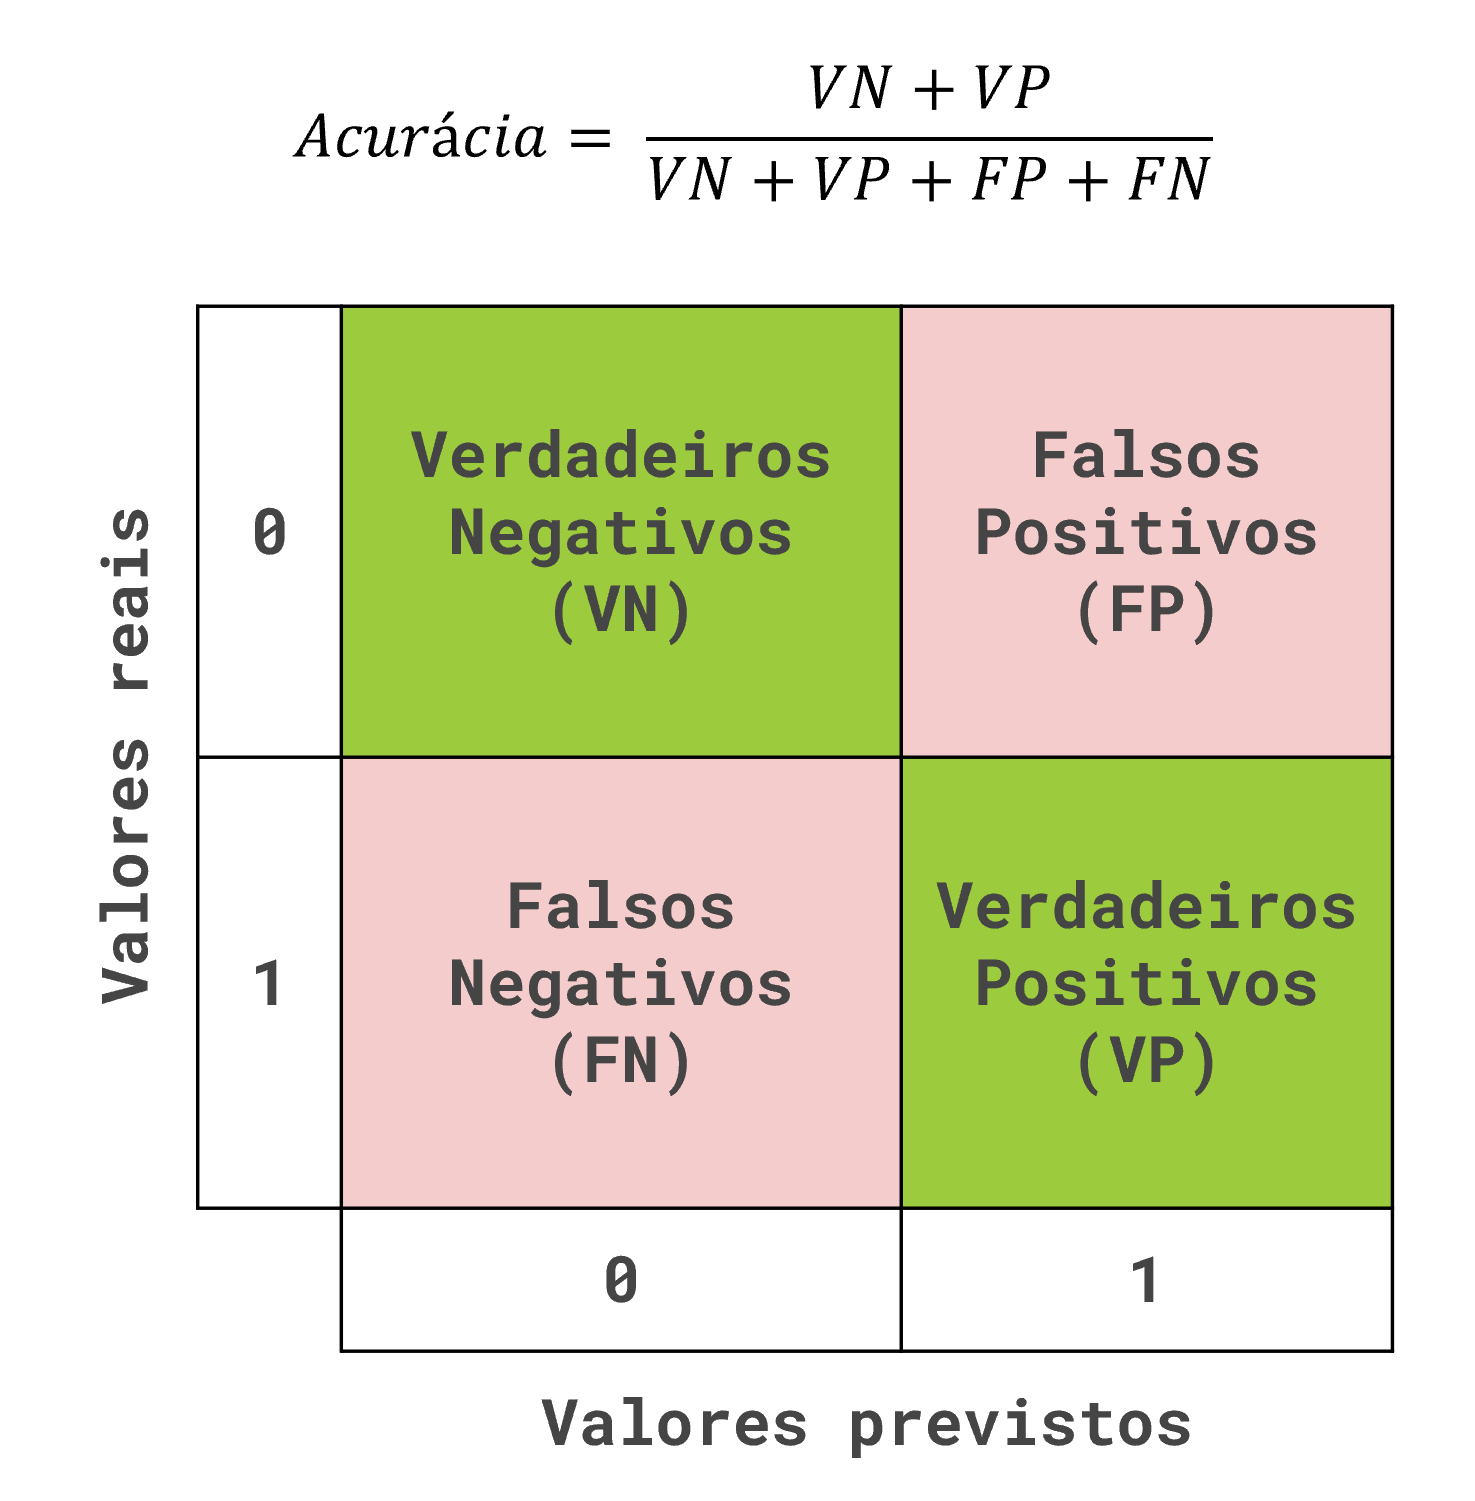

Revocação (recall)
Mede a proporção de dados positivos que foram corretamente identificados pelo modelo, ou seja, revela a capacidade do modelo em evitar a classificação incorreta de dados positivos como negativos. É usada quando o risco ou custo de classificar falsos negativos é alto. Por exemplo, em casos de diagnóstico de doenças graves, em que é fundamental detectar corretamente a presença da doença.

Abaixo podemos constatar o cálculo do recall a partir da matriz de confusão. O recall só leva em consideração os valores positivos reais, ou seja, os valores da segunda linha da matriz. Ele é calculado a partir da divisão entre Verdadeiros Positivos (VP) pela soma de todos os positivos reais (VP + FN):

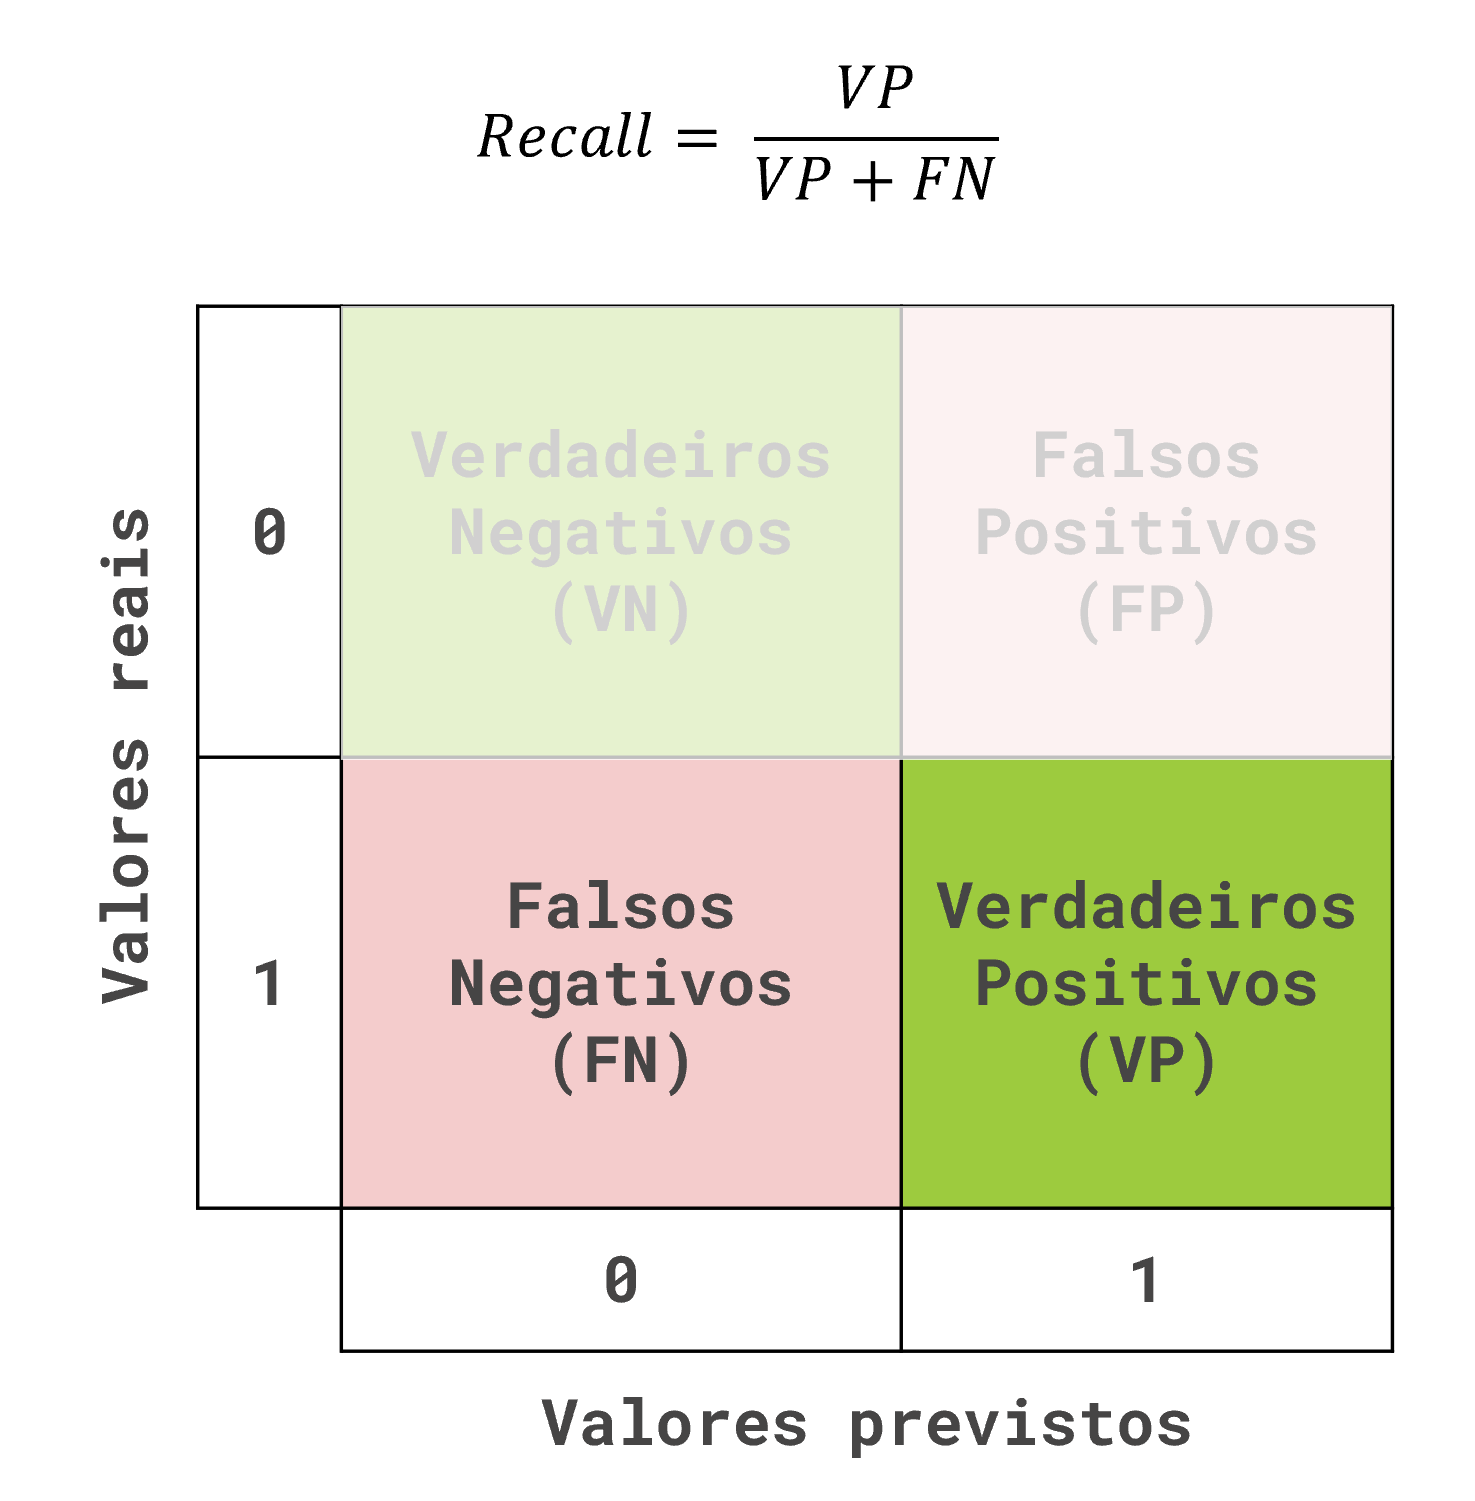




#### Precisão


Mede a proporção de dados classificados como positivos que são realmente positivos, ou seja, revela a capacidade do modelo em evitar a classificação incorreta de dados negativos como positivos. É usada quando o risco ou custo de classificar falsos positivos é alto, por exemplo em casos de seleção de ações no mercado financeiro, onde o importante é selecionar ações que tenham grande probabilidade de retorno, abaixando a quantidade de ações ruins (falsos positivos) mesmo que outras boas ações não tenham sido detectadas pelo modelo (falso negativo). A precisão também é importante no exemplo de detecção de doenças, onde queremos evitar que pacientes saudáveis sejam erroneamente classificados como doentes.

Abaixo podemos analisar o cálculo da precisão a partir da matriz de confusão. A precisão só leva em consideração os valores positivos previstos pelo modelo, ou seja, os valores da segunda coluna da matriz. Ela é calculada a partir da divisão entre Verdadeiros Positivos (VP) pela soma de todos os positivos previstos (VP + FP):

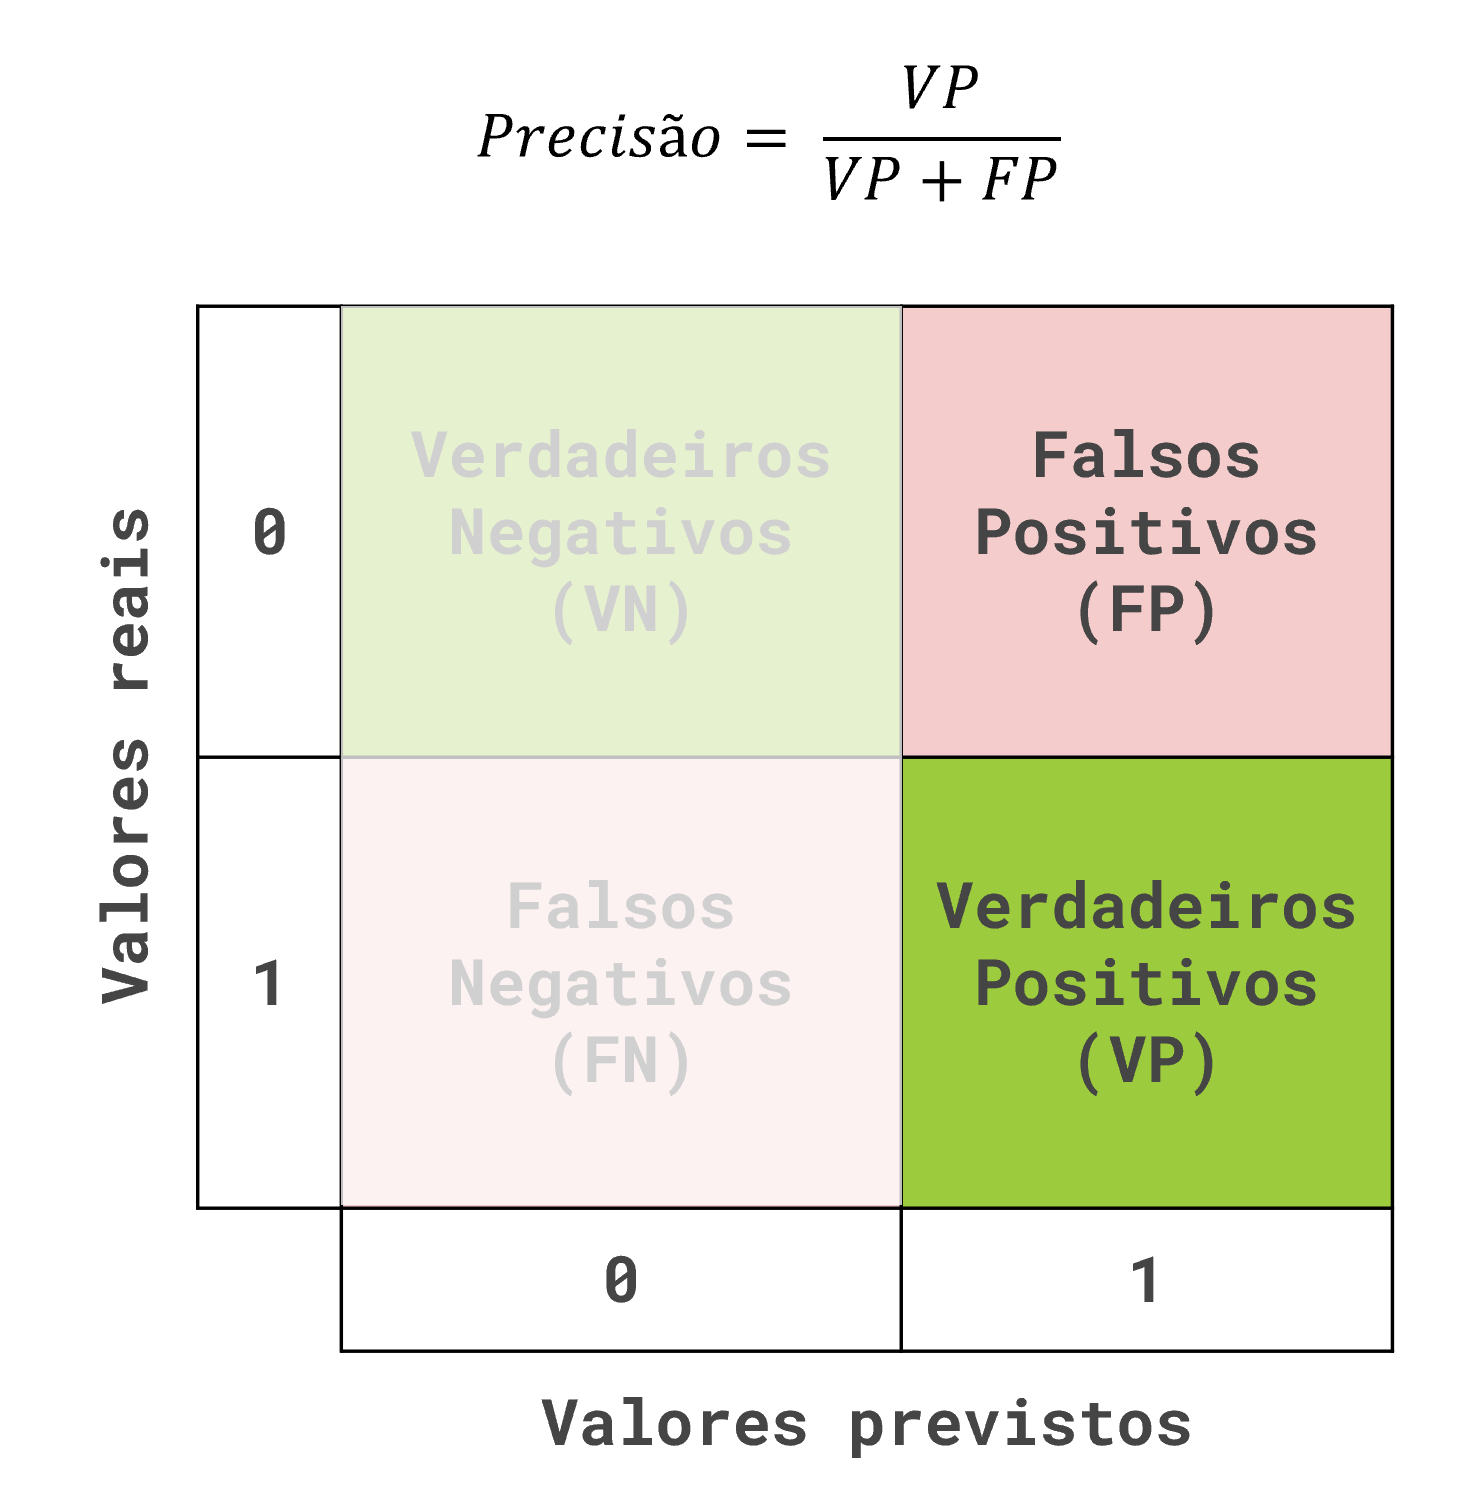

#### F1-Score


Fornece um equilíbrio entre o recall e a precisão, sendo útil quando as classes da variável alvo estão desbalanceadas, ou seja, quando há uma quantidade de dados muito diferente para cada classe. Além disso, é aplicável quando o risco ou custo de falsos positivos e de falsos negativos é alto simultaneamente. Em casos de detecção de tumores em pacientes, é preciso ter um equilíbrio entre evitar erros na detecção de tumores quando a pessoa realmente os possui e evitar erros ao informar que uma pessoa possui um tumor quando na realidade ela não possui.

O cálculo do F1-Score é feito a partir da média harmônica entre a precisão e o recall. Portanto, equivale a 2 vezes a precisão pelo recall, dividido pela soma entre a precisão e o recall:

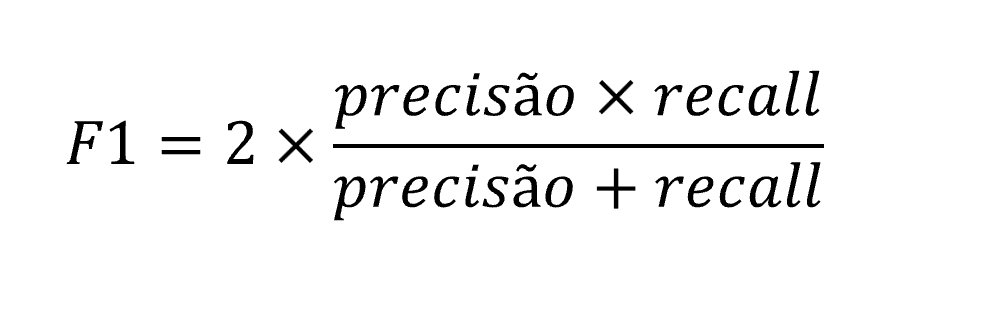

A escolha da métrica de classificação adequada depende do problema que está sendo resolvido e de cada cenário. Nos casos em que as classes estão balanceadas e possuem importância semelhante, a acurácia pode ser uma boa métrica inicial. Porém, quando as classes estão desequilibradas ou os erros têm custos diferentes, métricas como precisão, recall e f1-score são mais indicadas.

### Curva ROC

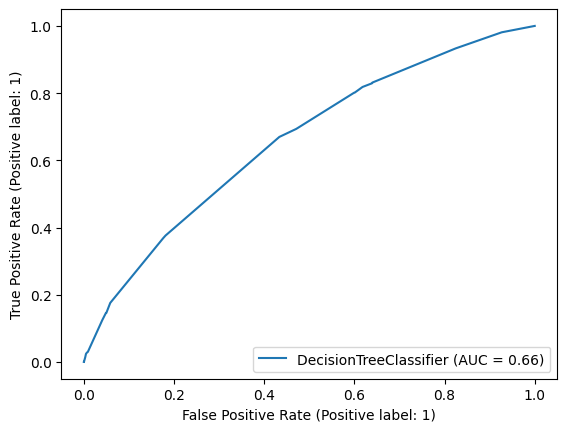

In [12]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
RocCurveDisplay.from_estimator(modelo, x_validacao, y_validacao)
plt.show()

### Curva de precisão x recall

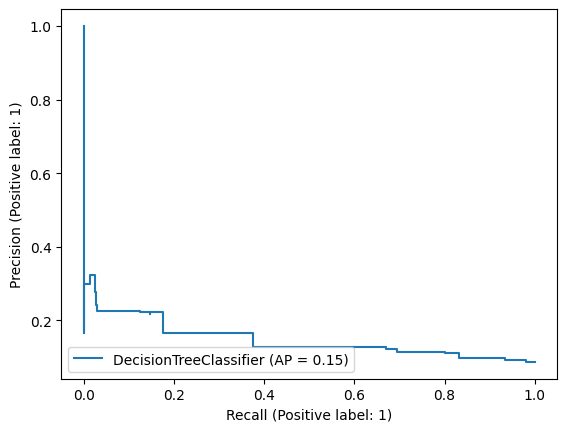

In [13]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(modelo, x_validacao, y_validacao)

### Relatório de métricas

In [14]:
from sklearn.metrics import classification_report
pred_y = modelo.predict(x_validacao)
print(classification_report(y_validacao, pred_y))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     10479
           1       0.17      0.00      0.00      1002

    accuracy                           0.91     11481
   macro avg       0.54      0.50      0.48     11481
weighted avg       0.85      0.91      0.87     11481



## <font color='dark'>Validação cruzada</h1>

### Usando o KFold

A validação do modelo de classificação a partir da separação dos dados em conjunto de treino e validação faz com que o resultado seja muito dependente dessa divisão dos dados e pode ser que, de forma aleatória, o padrão dos dados de validação sejam diferentes do padrão dos dados de treinamento, levando a sorte de ter um resultado muito melhor do que a realidade ou o azar de um resultado muito pior do que a realidade.

Levando isso em consideração, é possível utilizar a **validação cruzada**, uma estratégia mais consistente e bem mais utilizada nos projetos de machine learning.

Na validação cruzada, ao invés de separarmos os dados em apenas treino e validação uma única vez, dividimos os dados em várias partes de mesmo tamanho. Em cada uma dessas divisões, será utilizada uma parte para validação e todas as outras para treinamento e o processo se repete até que todas as partes sejam utilizadas para validação e o restante para treinamento.

Será gerado um modelo para cada uma dessas divisões e a avaliação de desempenho será feita tirando a média da métrica de cada modelo. Isso faz com que a dependência da separação dos dados seja eliminada, já que há uma variação maior da escolha dos dados e é retirada uma média.

Geralmente são utilizadas 5 ou 10 partes, mais do que isso não é tão necessário porque necessita de um processamento maior e valores menores já mitiga o problema da escolha dos dados.

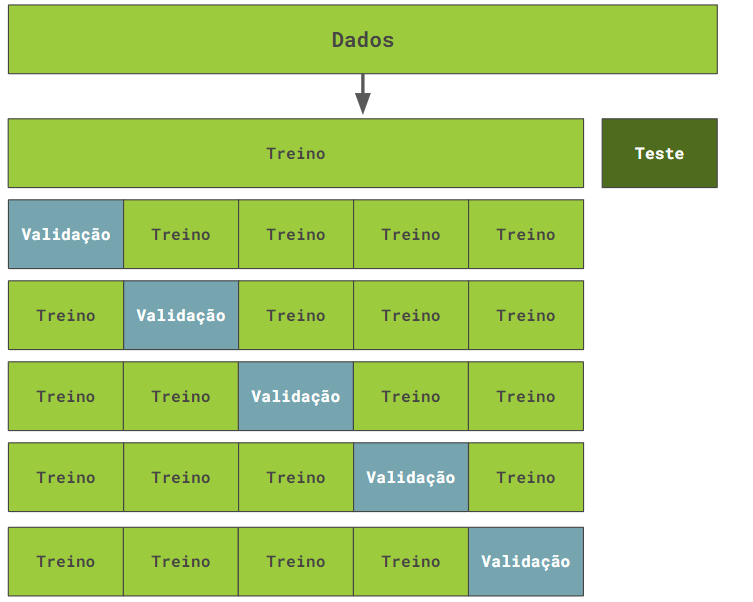

In [15]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.tree import DecisionTreeClassifier
SEED = 5
#SEPARAR FEATURES(X) E CLASSIFICAÇÃO (Y)
x = dados.drop ('inadimplente', axis = 1) #FEATURES
y = dados['inadimplente'] #CLASSES

#criar um modelo de arvore de decisao
modelo = DecisionTreeClassifier(max_depth=5) #instanciando o modelo

#divisão dos dados de treino e validação
kf = KFold(n_splits=5, shuffle=True, random_state = SEED)

#validação cruzada
results = cross_validate(modelo, x, y, cv = kf, scoring = 'recall')
results['test_score']

array([0.01319797, 0.00530223, 0.00214823, 0.        , 0.00107181])

### Validação cruzada com recall

In [16]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.tree import DecisionTreeClassifier
SEED = 5
#SEPARAR FEATURES(X) E CLASSIFICAÇÃO (Y)
x = dados.drop ('inadimplente', axis = 1) #FEATURES
y = dados['inadimplente'] #CLASSES

#criar um modelo de arvore de decisao
modelo = DecisionTreeClassifier(max_depth=5) #instanciando o modelo

#divisão dos dados de treino e validação
kf = KFold(n_splits=5, shuffle=True, random_state = SEED)

#validação cruzada
results = cross_validate(modelo, x, y, cv = kf, scoring = 'recall')
results['test_score']

array([0.01319797, 0.00530223, 0.00214823, 0.        , 0.00107181])

In [17]:
def intervalo_confianca(results):
  media = results.mean()
  desvio = results.std()
  print(f'Intervalo de Confiança: [{max(media - 2*desvio,0)}, {min(media + 2*desvio,1)}]')

In [18]:
intervalo_confianca(results['test_score'])

Intervalo de Confiança: [0, 0.013881759454416711]


### Oversampling

In [19]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score

SEED = 5

#separar features(x) e classificação(y)
x = dados.drop('inadimplente', axis = 1)
y = dados['inadimplente']

#balanceamento
smote = SMOTE(random_state = SEED)
x, y = smote.fit_resample(x, y)
y.value_counts(normalize=True)

#treino e teste split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25, random_state = SEED, stratify = y)


#divisão dos dados de treino e validação para cross validação
kf = StratifiedKFold(n_splits=5, shuffle = True, random_state = SEED)

#validação cruzada
modelo = DecisionTreeClassifier(max_depth=5)
results = cross_validate(modelo, train_x, train_y, cv = kf, scoring = 'recall')

#intervalo de confiança -> para comparar com outros modelos e escolher o melhor
intervalo_confianca(results['test_score'])

#ajustar o modelo final - entrega
modelo.fit(train_x, train_y)

#avaliar o modelo final - metrica final de teste
previsoes = modelo.predict(test_x)
print(recall_score(test_y, previsoes))

Intervalo de Confiança: [0.7045960943727599, 0.7423635686482138]
0.7169857235561323


### Undersampling

In [20]:
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from imblearn.pipeline import Pipeline

SEED = 5

#separar features(x) e classificação(y)
x = dados.drop('inadimplente', axis = 1)
y = dados['inadimplente']

#balanceamento
nearmiss = NearMiss(version = 3)
x, y = nearmiss.fit_resample(x, y)
y.value_counts(normalize=True)

#treino e teste split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25, random_state = SEED, stratify = y)


#divisão dos dados de treino e validação para cross validação
kf = StratifiedKFold(n_splits=5, shuffle = True, random_state = SEED)

#validação cruzada
modelo = DecisionTreeClassifier(max_depth=5)
results = cross_validate(modelo, train_x, train_y, cv = kf, scoring = 'recall')

#intervalo de confiança -> para comparar com outros modelos e escolher o melhor
intervalo_confianca(results['test_score'])

#ajustar o modelo final - entrega
modelo.fit(train_x, train_y)

#avaliar o modelo final - metrica final de teste
previsoes = modelo.predict(test_x)
print(recall_score(test_y, previsoes))

Intervalo de Confiança: [0.5530569149941459, 0.7457300339186631]
0.720949957591179


### Pipeline

In [21]:
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from imblearn.pipeline import Pipeline

SEED = 5

#separar features(x) e classificação(y)
x = dados.drop('inadimplente', axis = 1)
y = dados['inadimplente']

#divisão dos dados de treino e validação para cross validação
kf = StratifiedKFold(n_splits=5, shuffle = True, random_state = SEED)

#validação cruzada
modelo = DecisionTreeClassifier(max_depth=5)

#pipeline
pipeline = Pipeline([('balanceamento', NearMiss(version = 3)), ('modelo', modelo)])
results = cross_validate(pipeline, x, y, cv = kf, scoring = 'recall')


#intervalo de confiança -> para comparar com outros modelos e escolher o melhor
intervalo_confianca(results['test_score'])

#ajustar o modelo final - entrega
nearmiss = NearMiss(version = 3)
x, y = nearmiss.fit_resample(x, y)
modelo.fit(x, y)


#avaliar o modelo final - metrica final de teste
previsoes = modelo.predict(test_x)
print(recall_score(test_y, previsoes))

Intervalo de Confiança: [0.6030695762857331, 0.6895652710281047]
0.7201017811704835


### Estratificando os dados